# KNN
`KNN` is a supervised learning algorithm used to predict the value of a dependent variable based on the values of one or more independent variables.

In [7]:
# import lbraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')


In [8]:
df= sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
# split x and y columns
x = df.drop(['species'],axis=1)
y = df['species']

In [11]:
# load and fit knn classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x,y)
#pridict the species
new_measurement = np.array([[5.1,3.5,1.4,0.2]])
knn.predict(new_measurement)

array(['setosa'], dtype=object)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


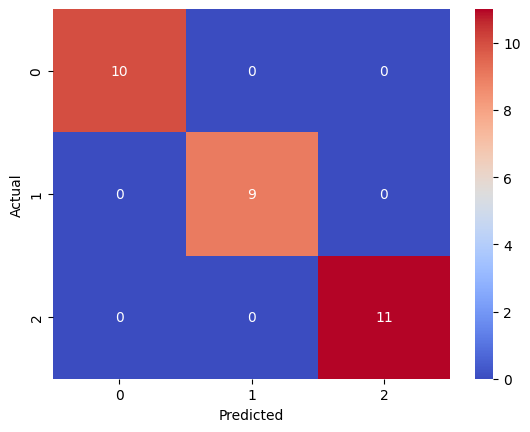

In [12]:
# train test split data 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
model = KNeighborsClassifier(n_neighbors=5)
# fit the model
model.fit(x_train,y_train)
# pridict
y_pred=model.predict(x_test)
# evaluate the model
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
#plot confusion matrix
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# regression

In [13]:
# regression problem on tips dataset 
data=sns.load_dataset ('tips')
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [14]:
# spit x and y columns
x = data.drop(['tip'],axis=1)
y = data['tip']
# train test split data

In [15]:
# encode the catigorical data using for lope and lebel encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in x.columns:
    if x[col].dtype == 'object'or x[col].dtype == 'category':
        x[col] = le.fit_transform(x[col])

In [16]:
# train test split data
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
model = KNeighborsRegressor(n_neighbors=5,p=2)

In [ ]:
# fit the model
model.fit(x_train,y_train)
# pridict
y_pred=model.predict(x_test)
# evaluate the model
from sklearn.metrics import mean_squared_error,r2_score,mean_squared_error
print('MSE',mean_squared_error(y_test,y_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2',r2_score(y_test,y_pred))




MSE 0.8382265306122448
RMSE 0.9155471209130881
R2 0.3294034029001649


In [20]:
# pridict 
model.predict([[19.82,1,1,1,1,3]])

array([2.844])